In [22]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [23]:
beml_df=pd.read_csv('/content/BEML.csv')
beml_df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


In [24]:
glaxo_df=pd.read_csv('/content/GLAXO.csv')
glaxo_df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11


In [18]:
# The DataFrames have a date column, so we can create a DatetimeIndex index from this column Date.
# It will ensure that the rows are sorted by time in ascending order.

In [25]:
beml_df= beml_df[['Date', 'Close']]
glaxo_df= glaxo_df[['Date', 'Close']]

In [26]:
beml_df = beml_df.set_index(pd.DatetimeIndex(beml_df['Date'])).drop('Date',axis=1)
glaxo_df = glaxo_df.set_index(pd.DatetimeIndex(glaxo_df['Date'])).drop('Date',axis=1)

In [27]:
beml_df.head()

,Close
Date,
2010-01-04,1135.60
2010-01-05,1134.60
2010-01-06,1139.60
2010-01-07,1144.15
2010-01-08,1144.05


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0, 0.5, 'Close')

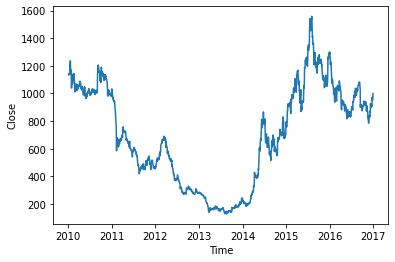

In [29]:
plt.plot(beml_df.Close)
plt.xlabel('Time')
plt.ylabel('Close')

Text(0, 0.5, 'Close')

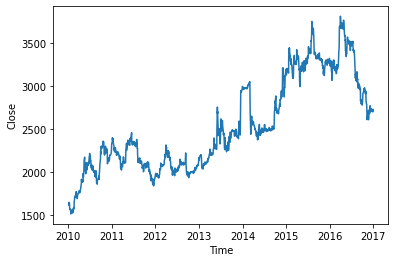

In [30]:
plt.plot(glaxo_df.Close)
plt.xlabel('Time')
plt.ylabel('Close')

In [35]:
beml_df['gain'] = beml_df.Close.pct_change(periods=1)
glaxo_df['gain'] = glaxo_df.Close.pct_change(periods=1)


In [36]:
beml_df.head(2)

,Close,gain
Date,,
2010-01-04,1135.6,NaN
2010-01-05,1134.6,-0.000881


In [37]:
glaxo_df.head(2)

,Close,gain
Date,,
2010-01-04,1625.65,NaN
2010-01-05,1616.80,-0.005444


In [38]:
#drop first row since it is NaN
glaxo_df = glaxo_df.dropna()
beml_df = beml_df.dropna()

Text(0, 0.5, 'Close')

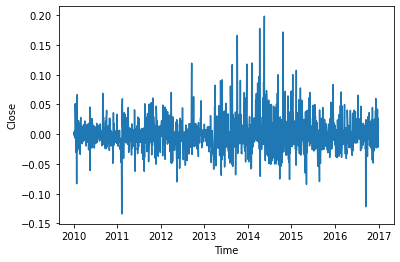

In [40]:
##Ques 1 - Expected rate of daily return - Plot the gain and show the graph on closing stock

#Plot the gain
plt.plot(beml_df.gain)
plt.xlabel('Time')
plt.ylabel('Close')

Text(0, 0.5, 'Close')

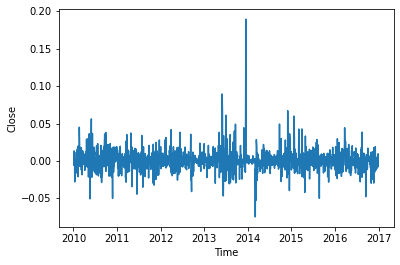

In [41]:
plt.plot(glaxo_df.gain)
plt.xlabel('Time')
plt.ylabel('Close')

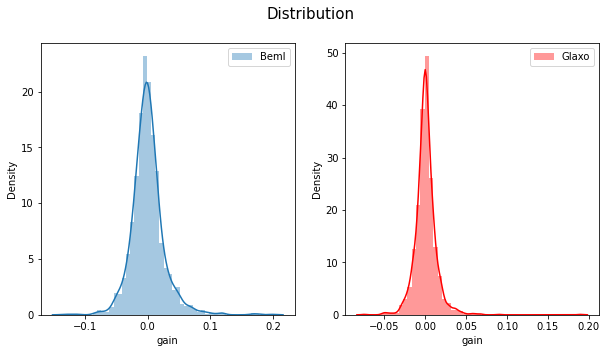

In [50]:
## Ques 2 - Higher risk as daily returns(gain) is concerned

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)   # 1 row,2 column, 1st graph
plt.suptitle('Distribution',fontsize=15)

sns.distplot(beml_df.gain, label = 'Beml')

plt.xlabel('gain')
plt.ylabel('Density')
plt.legend()

plt.subplot(1,2,2)   # 1 row,2 column, 1st graph
plt.suptitle('Distribution',fontsize=15)

sns.distplot(glaxo_df.gain, label = 'Glaxo', color= 'r')

plt.xlabel('gain')
plt.ylabel('Density')
plt.legend()


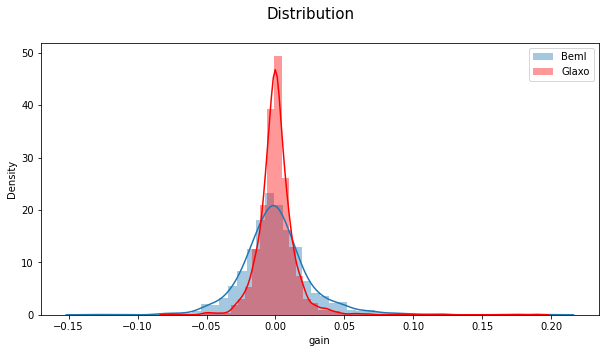

In [51]:
# if we want to see it in the same graph just remove the subplot

plt.figure(figsize=(10,5))
plt.suptitle('Distribution',fontsize=15)

sns.distplot(beml_df.gain, label = 'Beml')

plt.xlabel('gain')
plt.ylabel('Density')
plt.legend()

plt.suptitle('Distribution',fontsize=15)

sns.distplot(glaxo_df.gain, label = 'Glaxo', color= 'r')

plt.xlabel('gain')
plt.ylabel('Density')
plt.legend()

In [57]:
## Above graph showns that beml has higher distance comparded too glaxo which makes it riskier to invest in beml than glaxo 
# as the standard deviation is higher in beml

print('Mean Beml:',beml_df.gain.mean())
print('Mean Glaxo:', glaxo_df.gain.mean())
print('Standard Deviation Beml:',beml_df.gain.std())
print('Standard Deviation Glaxo:', glaxo_df.gain.std())

Mean Beml: 0.0002707480790572326
Mean Glaxo: 0.0003860410825922916
Standard Deviation Beml: 0.026430831468474872
Standard Deviation Glaxo: 0.013360538552253337


In [59]:
# To round off to 4 values

print('Mean Beml:',round(beml_df.gain.mean(),4))
print('Mean Glaxo:', round(glaxo_df.gain.mean(),4))
print('Standard Deviation Beml:',round(beml_df.gain.std(),4))
print('Standard Deviation Glaxo:', round(glaxo_df.gain.std(),4))

Mean Beml: 0.0003
Mean Glaxo: 0.0004
Standard Deviation Beml: 0.0264
Standard Deviation Glaxo: 0.0134


In [65]:
## Ques 3: Which stock has higher probability of making of daily return of 2% or more?

from scipy import stats

In [63]:
#Probability of making 2% loss or higher in Beml

stats.norm.cdf( -0.02,loc=beml_df.gain.mean(), scale=beml_df.gain.std())

0.22155987503755292

In [64]:
#Probability of making 2% gain or higher in Beml

1 - stats.norm.cdf(0.02,loc=beml_df.gain.mean(), scale=beml_df.gain.std())

0.22769829484075355

In [66]:
#Probability of making 2% loss or higher in Glaxo

stats.norm.cdf( -0.02,loc=glaxo_df.gain.mean(), scale=glaxo_df.gain.std())

0.06352488667177401

In [67]:
#Probability of making 2% gain or higher in Glaxo

1 - stats.norm.cdf(0.02,loc=glaxo_df.gain.mean(), scale=glaxo_df.gain.std())

0.07104511457618568